# build a CNN model

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split

IMG_DIM = (150, 150)

# load image and covert to numpy array
all_files = glob.glob('fig_wave/*')
# all_files = glob.glob('fig_specgram/*')
all_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in all_files]
all_imgs = np.array(all_imgs)
all_labels = [fn.split('\\')[1].split('.')[0].split('_')[0].strip() for fn in all_files]

# seperate train and validation dataset
# train_imgs, validation_imgs, train_labels, validation_labels = train_test_split(all_imgs, all_labels, test_size=0.33, random_state=42)
train_imgs, not_train_imgs, train_labels, not_train_labels = train_test_split(all_imgs, all_labels, test_size=0.5, random_state=42)
validation_imgs, test_imgs, validation_labels, test_labels = train_test_split(not_train_imgs, not_train_labels, test_size=0.5, random_state=42)

print('Train dataset shape:', train_imgs.shape, 
      '\nValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (150, 150, 150, 3) 
Validation dataset shape: (75, 150, 150, 3)


In [3]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
test_imgs_scaled = test_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255
test_imgs_scaled /= 255

In [4]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

from sklearn.preprocessing import LabelEncoder

# encode text to labels
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)
test_labels_enc = le.transform(test_labels)

print (train_labels[0:4], train_labels_enc[0:4])
print (train_labels_enc.shape, validation_labels_enc.shape)

['waterfall', 'pond', 'waterfall', 'waterfall'] [1 0 1 1]
(150,) (75,)


In [5]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers, losses

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=losses.binary_crossentropy, 
              optimizer=optimizers.adam(), metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flat

In [13]:
import time
start = time.time()
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)
end = time.time()
print(end - start)

Train on 150 samples, validate on 75 samples
Epoch 1/30
150/150 [==============================] - 9s 59ms/step - loss: 2.8124e-05 - acc: 1.0000 - val_loss: 2.2166e-04 - val_acc: 1.0000
Epoch 2/30
150/150 [==============================] - 9s 57ms/step - loss: 2.7090e-05 - acc: 1.0000 - val_loss: 2.1558e-04 - val_acc: 1.0000
Epoch 3/30
150/150 [==============================] - 9s 57ms/step - loss: 2.6228e-05 - acc: 1.0000 - val_loss: 2.0957e-04 - val_acc: 1.0000
Epoch 4/30
150/150 [==============================] - 9s 57ms/step - loss: 2.5694e-05 - acc: 1.0000 - val_loss: 2.0616e-04 - val_acc: 1.0000
Epoch 5/30
150/150 [==============================] - 9s 57ms/step - loss: 2.4439e-05 - acc: 1.0000 - val_loss: 1.9937e-04 - val_acc: 1.0000
Epoch 6/30
150/150 [==============================] - 9s 58ms/step - loss: 2.3619e-05 - acc: 1.0000 - val_loss: 1.9364e-04 - val_acc: 1.0000
Epoch 7/30
150/150 [==============================] - 9s 59ms/step - loss: 2.2982e-05 - acc: 1.0000 - val_los

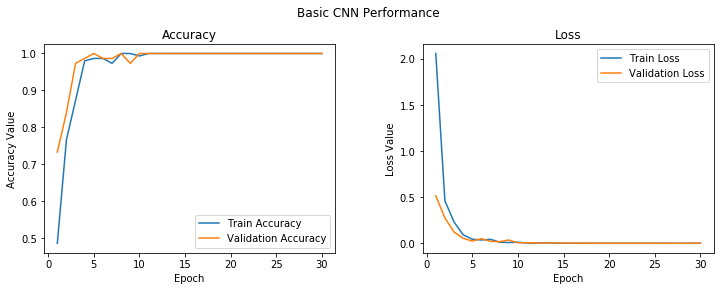

In [7]:
def plot_accuracy(history):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    t = f.suptitle('Basic CNN Performance', fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)

    epoch_lenght = len(history.history['acc'])+1
    epoch_list = list(range(1,epoch_lenght))
    ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
    ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
    ax1.set_xticks(np.arange(0, epoch_lenght, 5))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(0, epoch_lenght, 5))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")
plot_accuracy(history)

# Prediction

In [8]:
predictions = model.predict_classes(test_imgs_scaled).T[0]
print (predictions)
print (test_labels_enc)

[1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0
 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0
 0]
[1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0
 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0
 0]


In [9]:
class_map = {'0': 'pond', '1':'waterfall'}
test_predict_labels = [class_map[str(label)] for label in predictions]
test_actual_labels = [class_map[str(label)] for label in test_labels_enc]

In [10]:
from sklearn import metrics
def get_metrics(true_labels, predicted_labels):    
    print('Accuracy:', metrics.accuracy_score(true_labels, predicted_labels))
    print('Precision:', metrics.precision_score(true_labels, predicted_labels, average='weighted'))
    print('Recall:', metrics.recall_score(true_labels, predicted_labels, average='weighted'))
    print('F1 Score:', metrics.f1_score(true_labels, predicted_labels,average='weighted'))
    
get_metrics(true_labels=test_actual_labels,predicted_labels=test_predict_labels)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [11]:
import pandas as pd
labels = ['pond','waterfall']
cm = metrics.confusion_matrix(y_true=test_actual_labels, y_pred=test_predict_labels)
cm_labeled = pd.DataFrame(cm, columns=labels, index=labels)
cm_labeled

,pond,waterfall
pond,35,0
waterfall,0,40
